# QF 627 Programming and Computational Finance
## Individual Assessment

***

> Good evening, Team. 👋

> This assessment is prepared so that you may review what you have learned on the course. You can find the answers from the lessons and from the scripts of each lesson that you have received throughout the course. Please do not feel yourselves to be under pressure. `Read each question carefully and answer accordingly`.

> Using Python in real-world financial data analysis does not mean simply executing a single step of an independent chunk of code. It requires a chain of lines of codes with a sharp logical progression. To give you a good exercise in real-world practice, the questions here, just like all the lessons and exercise problem sets, require you to go through `inter-related` and `logically deduced lines of programming`.

***

> Below are 10 questions. Each question asks you to program a sequence of codes that lead to an answer. First `ensure you fully understand the question`, in order not to overlook essential processes and answers. When questions ask for answers in addition to lines of codes, provide them using a markdown cell.

***

> Be sure to submit your work before the deadline: `9:30pm tonight, November 9, 2021`. It is an open-book exercise, and is also a timed task. To be fair to all students, a late submission will incur a point reduction.

> Please note `your last name` for `naming your submission` file (e.g., `Roh.ipynb`)

> If you find that you cannot answer a question, it would be wise to move on to another question that you can answer, and to finish that one first. `Make the best use of the time available`. If you cannot fully answer all the questions, then do as much as you can.

***

> Under a relative grading scheme, not everyone can receive an A grade for the course. This is school policy. If you find the questions easy, that does not guarantee your good final performance. If you find the questions a bit difficult, that is so that you may be given a valid and fair assessment. `It does not mean that you are failing`.

***

> Rather than feeling pressured by the assessment, I hope you will enjoy the opportunity presented by the hands-on exercise. You will notice that `answering each question will further consolidate your learning`.

***

> I wish you the best for your individual assessment, Team.🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [15]:
# Our standardized printing options

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

###  <font color = blue> 👉 Question 1</font>. Extract the stock prices of the following ticker symbols, from July 2012 to June 2020.

| Security | Symbol |
| -------- | ------ |
Merck | `MRK`
Marriott | `MAR`
3M | `MMM`
Adobe | `ADBE`
Aon | `AON`
American Airlines | `AAL`
Capital One | `COF`
Coca-Cola | `KO`
Citigroup | `C`

### Assess which of the pairs of tickers (there are 36 unique possible pairs) appear to show the closest relationships (i.e., greatest correlations) when comparing daily percentage changes.

### Make sure to provide the lines of code that lead to your answers, and give your answers in `Answer 1 cell`.

In [16]:
import pandas_datareader.data as web
import datetime

In [17]:
def extract(TICKERS, start, end):
    def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
    S = map(data, TICKERS)
    return pd.concat(S, keys = TICKERS, names = ["Ticker", "Date"])

In [18]:
s = ['MRK', 'MAR', 'MMM', 'ADBE', 'AON', 'AAL', 'COF', 'KO', 'C']
start = datetime.date(2012, 7, 1)
end = datetime.date(2020, 6, 30)
T9 = extract(s, start, end)

In [19]:
T9 = T9[['Adj Close']]
T9 = T9.reset_index().set_index('Date')

In [20]:
T9_pct = pd.DataFrame(index = T9.index)
for i, j in T9.groupby('Ticker'):
    temp = j['Adj Close']
    temp.name = i
    T9_pct = pd.merge(T9_pct, temp, on = 'Date')

In [21]:
T9_pct = T9_pct.pct_change().dropna()

In [22]:
def kill1(x):
    if x == 1:
        return 0
    else: 
        return x

In [23]:
for i in T9_pct.corr():
    print(T9_pct.corr()[i].nlargest(2))

AAL   1.000
MAR   0.504
Name: AAL, dtype: float64
ADBE   1.000
C      0.486
Name: ADBE, dtype: float64
AON   1.000
C     0.553
Name: AON, dtype: float64
C     1.000
COF   0.782
Name: C, dtype: float64
COF   1.000
C     0.782
Name: COF, dtype: float64
KO    1.000
AON   0.505
Name: KO, dtype: float64
MAR   1.000
COF   0.589
Name: MAR, dtype: float64
MMM   1.000
C     0.587
Name: MMM, dtype: float64
MRK   1.000
KO    0.446
Name: MRK, dtype: float64


### <font color = red> Answer 1 </font>

    The answer is ____C________&_____COF_________ .
    

## 👇 Questions 2 to 5 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 2</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [24]:
def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
google = data('GOOGL')[['Adj Close']]

google['SMA42'] = google['Adj Close'].rolling(42).mean()

google['ShortPoint'] = google['Adj Close'].rolling(42).mean() + google['Adj Close'].rolling(42).std() * 2
google['LongPoint'] = google['Adj Close'].rolling(42).mean() - google['Adj Close'].rolling(42).std() * 2

google["Position"] = 0
google = google.dropna()

def long_or_short(x):
    if x["Adj Close"] < x["LongPoint"]:
        return 1
    elif x["Adj Close"] > x["ShortPoint"]:
        return -1
    else:
        return 0

google["Position"] = google.apply(long_or_short, axis = 1)

google["our_positions"] = google["Position"].diff()

### <font color = red> Answer 2 is presented in the cell below: </font>

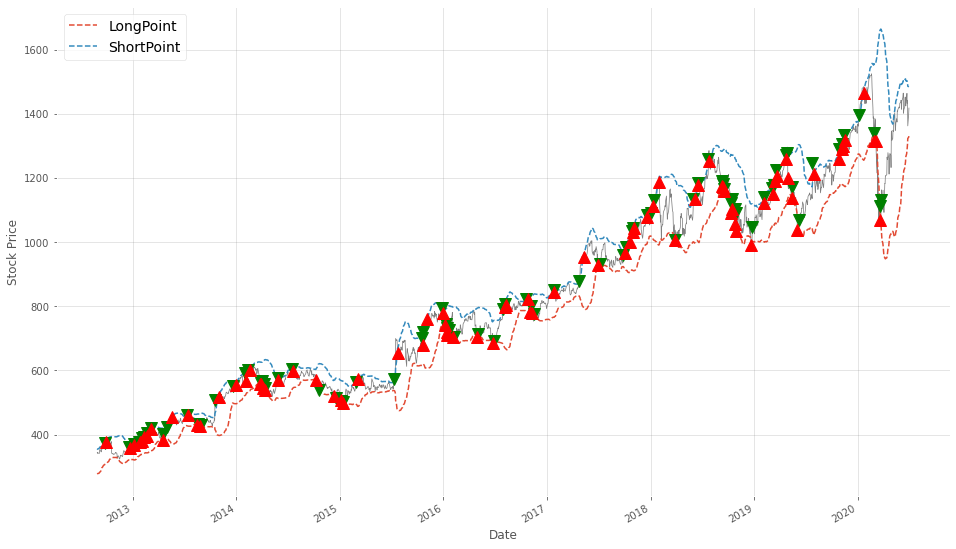

In [25]:
fig = plt.figure(figsize = (16, 10))

sub = fig.add_subplot(111,
                      ylabel = "Stock Price")

google["Adj Close"].plot(ax = sub,
                      color = "grey",
                      lw = 0.75) # Closing Price

google[["LongPoint",
        "ShortPoint"]].plot(ax = sub,
                               style = ["--", "--"]
                               )

sub.plot(google.loc[google.our_positions == -1.0].index, # Selling
         google["Adj Close"][google.our_positions == -1.0], 
         "v",
         color = "green",
         markersize = 12)

sub.plot(google.loc[google.our_positions == 1.0].index, # Buying
         google["Adj Close"][google.our_positions == 1.0], 
         "^",
         color = "red",
         markersize = 12)

plt.show()

### <font color = blue> 👉 Question 3</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [26]:
capital = 200000

In [27]:
def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
apple = data('AAPL')[['Adj Close']]

apple['SMA42'] = apple['Adj Close'].rolling(42).mean()

apple['ShortPoint'] = apple['Adj Close'].rolling(42).mean() + apple['Adj Close'].rolling(42).std() * 2
apple['LongPoint'] = apple['Adj Close'].rolling(42).mean() - apple['Adj Close'].rolling(42).std() * 2

apple["Position"] = 0
apple = apple.dropna()

def long_or_short(x):
    if x["Adj Close"] < x["LongPoint"]:
        return 1
    elif x["Adj Close"] > x["ShortPoint"]:
        return -1
    else:
        return 0

apple["Position"] = apple.apply(long_or_short, axis = 1)
apple["our_positions"] = apple["Position"].diff()
difference_in_shares_owned = apple["our_positions"].diff()
apple['portfolioValue'] = apple["Position"] * apple["Adj Close"]
apple["our_holdings"] = (apple["our_positions"].multiply(apple["Adj Close"],axis = 0))
our_capital = 200000
apple["our_cash"] = our_capital - difference_in_shares_owned.multiply(apple["Adj Close"]).cumsum()
apple["total"] = apple["our_cash"] + apple["our_holdings"]
apple['return'] = apple["total"].pct_change()
np.sqrt(253) * apple['return'].mean() / apple['return'].std()

0.6137124080289155

In [28]:
apple

,Adj Close,SMA42,ShortPoint,LongPoint,Position,our_positions,portfolioValue,our_holdings,our_cash,total,return
Date,,,,,,,,,,,
2012-08-29,20.710,19.041,20.771,17.311,0,NaN,0.000,NaN,NaN,NaN,NaN
2012-08-30,20.415,19.095,20.852,17.338,0,0.000,0.000,0.000,NaN,NaN,NaN
2012-08-31,20.457,19.145,20.935,17.355,0,0.000,0.000,0.000,200000.000,200000.000,NaN
2012-09-04,20.756,19.195,21.045,17.344,0,0.000,0.000,0.000,200000.000,200000.000,0.000
2012-09-05,20.611,19.244,21.133,17.354,0,0.000,0.000,0.000,200000.000,200000.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,89.149,79.575,90.782,68.368,0,1.000,0.000,89.149,199935.924,200025.073,0.000
2020-06-25,90.332,80.061,91.323,68.800,0,0.000,0.000,0.000,200026.256,200026.256,0.000
2020-06-26,87.557,80.508,91.421,69.595,0,0.000,0.000,0.000,200026.256,200026.256,0.000


In [29]:
def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
amazon = data('AMZN')[['Adj Close']]

amazon['SMA42'] = amazon['Adj Close'].rolling(42).mean()

amazon['ShortPoint'] = amazon['Adj Close'].rolling(42).mean() + amazon['Adj Close'].rolling(42).std() * 2
amazon['LongPoint'] = amazon['Adj Close'].rolling(42).mean() - amazon['Adj Close'].rolling(42).std() * 2

amazon["Position"] = 0
amazon = amazon.dropna()

def long_or_short(x):
    if x["Adj Close"] < x["LongPoint"]:
        return 1
    elif x["Adj Close"] > x["ShortPoint"]:
        return -1
    else:
        return 0

amazon["Position"] = amazon.apply(long_or_short, axis = 1)
amazon["our_positions"] = amazon["Position"].diff()
difference_in_shares_owned = amazon["our_positions"].diff()
amazon['portfolioValue'] = amazon["Position"] * amazon["Adj Close"]
amazon["our_holdings"] = (amazon["our_positions"].multiply(amazon["Adj Close"],axis = 0))
our_capital = 200000
amazon["our_cash"] = our_capital - difference_in_shares_owned.multiply(amazon["Adj Close"]).cumsum()
amazon["total"] = amazon["our_cash"] + amazon["our_holdings"]
amazon['return'] = amazon["total"].pct_change()
np.sqrt(253) *amazon['return'].mean() / amazon['return'].std()

0.0028686035293581068

### <font color = red> Answer 3 </font>

    The answer is _____Apple_______ .

### <font color = blue> 👉 Question 4</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [30]:
def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
google = data('GOOGL')[['Adj Close']]

google['SMA42'] = google['Adj Close'].rolling(42).mean()

google['ShortPoint'] = google['Adj Close'].rolling(42).mean() + google['Adj Close'].rolling(42).std() * 2
google['LongPoint'] = google['Adj Close'].rolling(42).mean() - google['Adj Close'].rolling(42).std() * 2

google["Position"] = 0
google = google.dropna()

def long_or_short(x):
    if x["Adj Close"] < x["LongPoint"]:
        return 1
    elif x["Adj Close"] > x["ShortPoint"]:
        return -1
    else:
        return 0

google["Position"] = google.apply(long_or_short, axis = 1)
google["our_positions"] = google["Position"].diff()
difference_in_shares_owned = google["our_positions"].diff()
google['portfolioValue'] = google["Position"] * google["Adj Close"]
google["our_holdings"] = (google["our_positions"].multiply(google["Adj Close"],axis = 0))
our_capital = 200000
google["our_cash"] = our_capital - difference_in_shares_owned.multiply(google["Adj Close"]).cumsum()
google["total"] = google["our_cash"] + google["our_holdings"]
google['return'] = google["total"].pct_change()
np.sqrt(253) *google['return'].mean() / google['return'].std()

-0.024751578068445967

In [31]:
google.tail(1)

,Adj Close,SMA42,ShortPoint,LongPoint,Position,our_positions,portfolioValue,our_holdings,our_cash,total,return
Date,,,,,,,,,,,
2020-06-30,1418.050,1407.680,1484.485,1330.875,0,0.000,0.000,0.000,199988.702,199988.702,0.000


In [32]:
apple.tail(1)

,Adj Close,SMA42,ShortPoint,LongPoint,Position,our_positions,portfolioValue,our_holdings,our_cash,total,return
Date,,,,,,,,,,,
2020-06-30,90.322,81.373,92.260,70.485,0,0.000,0.000,0.000,200026.256,200026.256,0.000


In [33]:
amazon.tail(1)

,Adj Close,SMA42,ShortPoint,LongPoint,Position,our_positions,portfolioValue,our_holdings,our_cash,total,return
Date,,,,,,,,,,,
2020-06-30,2758.820,2509.088,2784.758,2233.417,0,0.000,0.000,0.000,200002.470,200002.470,0.000


### <font color = red> Answer 4 </font>

    GOOGL : ______199988.702______ 
    
    AAPL  : _____200026.256_______ 
     
    AMZN  : ____200002.470________ 
Note: I only buy/sell 1 share of stock in this my backtest. In our class, we buy 200
    

### <font color = blue> 👉 Question 5</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [34]:
(google.tail(1).total.values[0] - our_capital) ** (365/len(google))

<ipython-input-34-16adbf263b6c>:1: RuntimeWarning: invalid value encountered in double_scalars
  (google.tail(1).total.values[0] - our_capital) ** (365/len(google))


nan

In [35]:
(apple.tail(1).total.values[0] - our_capital) ** (365/len(apple)) - 1

0.8315592917746042

In [36]:
(amazon.tail(1).total.values[0] - our_capital) ** (365/len(apple)) - 1

0.1822890983978629

### <font color = red> Answer 5 </font>

    GOOGL : ____________ 
    
    AAPL  : ____________ 
     
    AMZN  : ____________ 

## 👇 Questions 6 to 8 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 6. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 (`visualization component`) is presented in the cell below: </font>

### <font color = red> Answer 6 </font>
    
    As to GS,
    
    The maximum drawdown is about ____________ percentage points.
    The longest drawdown period lasts for _____________ days.
    
    As to JPM,
    
    The maximum drawdown is about ____________ percentage points.
    The longest drawdown period lasts for _____________ days.
    

###  <font color = blue> 👉 Question 7. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 </font>

    The answer is ____________________________ .

###  <font color = blue> 👉 Question 8. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 8 </font>

    The answer is ____________________________ .

## 👇 Questions 9 and 10 ask you to build, execute, and backtest a strategy using `Supervised Machine Learning (here, classification)`.

###  <font color = blue> 👉 Question 9. </font> Our securities of interest is Nasdaq 100 Index (`qqq`). The time period for analysis is from November 2013 to October 2021.

### Please predict tomorrow’s index level (market movement) from the index levels of the past seven days (including today).

### The machine learning algorithms of choice are `Support Vector Machine`, `Random Forest`, and `Ada Boost`.

### Between the three algorithms, which one shows the greatest overfitting?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 9 </font>

    The answer is ____________________________ .

###  <font color = blue> 👉 Question 10. </font> Estimate the Sharpe Ratio of your strategies based on the three algorithms.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 10 </font>

    Support Vector Machine : ____________ 
    
    Random Forest  : ____________ 
     
    Ada Boost  : ____________ 

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊